In [1]:
import torch 
import numpy as np
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from tqdm import tqdm

/home/pai/envs/fbc/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("./emotions.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


In [3]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [4]:
fft_data = data.loc[:, 'fft_0_b': 'fft_749_b']
fft_data

,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,-508.0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,126.0,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,-85.9,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,69.5,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,226.0,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,105.0,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,-23.0,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-288.0,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,109.0,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


<AxesSubplot:>

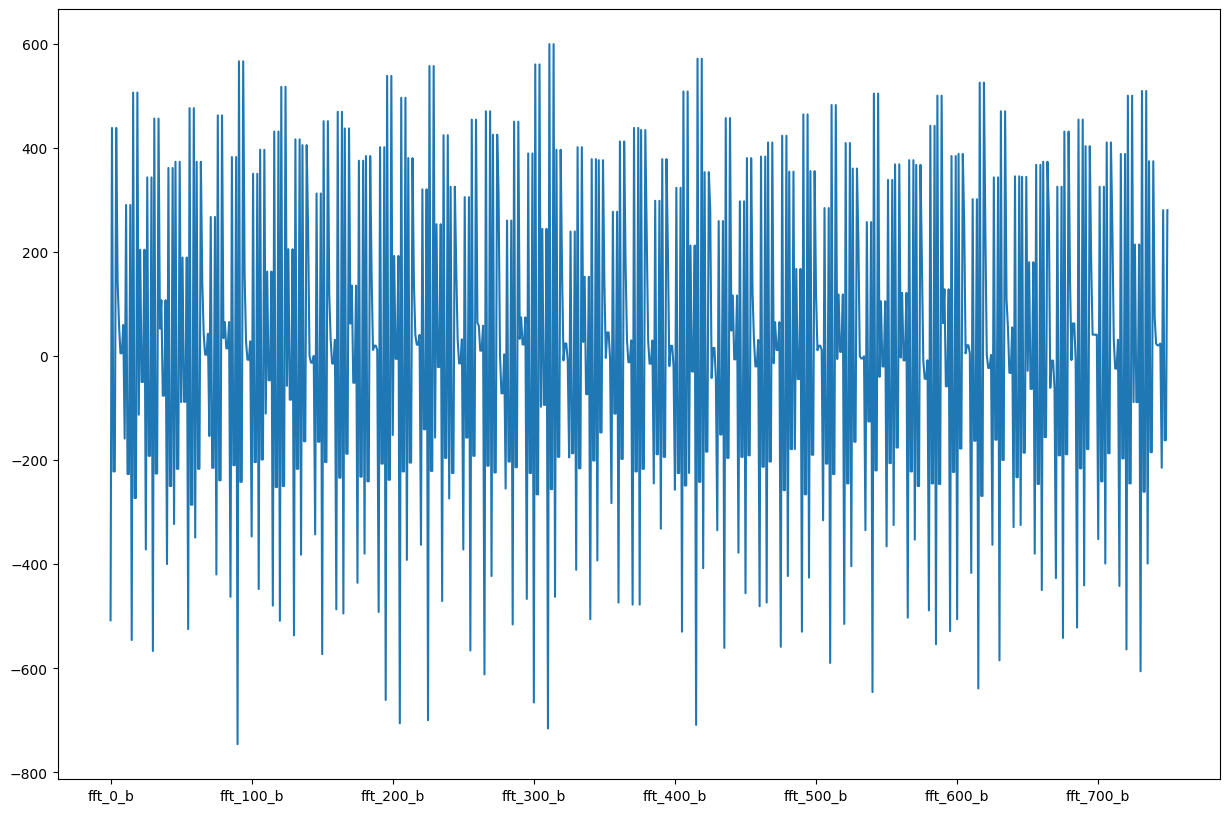

In [5]:
fft_data.iloc[0, :].plot(figsize=(15, 10))

# Encoding the 3 distinct labels

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [8]:
data['label']

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

label encoding:
- negative: 0
- positive: 1
- neutral : 2

# Splitting the Train/Test sets

In [9]:
y = data.pop('label')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1], 1))
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [10]:
X_train.shape

(1492, 2548, 1)

In [11]:
y_train.shape

(1492, 3)

# Define Network

In [12]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True) # input [n_batch, n_seq, n_inputsz=1]
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        gru_output, _ = self.gru(x)
        flat = self.flatten(gru_output[:, -1: :])
        output = self.fc(flat)
        return output

# 定义模型输入、输出维度
input_size = 1
hidden_size = 256
output_size = 3

# 创建模型实例
model = GRUModel(input_size, hidden_size, output_size)

# 打印模型结构
print(model)

GRUModel(
  (gru): GRU(1, 256, batch_first=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)


In [13]:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('the model will be trained on: ', device)
    model.to(device)

the model will be trained on:  cuda


GRUModel(
  (gru): GRU(1, 256, batch_first=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

In [14]:
from torchsummary import summary
summary(model, input_size=(32, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               GRU-1  [[-1, 32, 256], [-1, 2, 256]]               0
           Flatten-2                  [-1, 256]               0
            Linear-3                    [-1, 3]             771
Total params: 771
Trainable params: 771
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 32.00
Params size (MB): 0.00
Estimated Total Size (MB): 32.00
----------------------------------------------------------------


# Training GRU

In [15]:
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.from_numpy(X_train).to(torch.float32).to(device)
y_train_tensor = torch.from_numpy(y_train.values).to(torch.float32).to(device)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

x_test_tensor = torch.from_numpy(X_test).to(torch.float32).to(device)
y_test_tensor = torch.from_numpy(y_test.values).to(torch.float32).to(device)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [17]:
def train(model, x_train, y_train, x_test, y_test, save_path='./model_gru/', n_epochs=100):
    """
    the training function.
    Attributes:
    - model: the instance of the network
    - save_path: the path to which the model state will be saved. None means w/o saving.

    Return: 
    the best model if save_path is not None, the last model otherwise
    """
    train_acc_list.clear()
    train_loss_list.clear()
    test_acc_list.clear()
    test_loss_list.clear()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('the model will be trained on: ', device)

    best_accuracy = 0.0
    
    for epoch in range(n_epochs):
        training_loss = 0.0
        testing_loss = 0.0
        correct = 0
        total = 0
        
        model.train()
        for inputs, labels in tqdm(train_loader):
            # print(inputs.shape, labels.shape)
            inputs = inputs.to(device)
            labels = labels.to(device)
            # print("lables.size", labels.shape)
            optimizer.zero_grad()
            
            outputs = model(inputs)
            # print(outputs.shape)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, label = torch.max(labels, 1)
            # print(predicted.shape)
            total += labels.size(0)
            correct += (predicted == label).sum().item()
        
        train_loss = training_loss / len(train_loader)
        train_loss_list.append(train_loss)
        train_accuracy = correct / total
        train_acc_list.append(train_accuracy)

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            
            for inputs, labels in test_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                testing_loss += loss.item()


                _, predicted = torch.max(outputs.data, 1)
                _, label = torch.max(labels, 1)
                total += labels.size(0)
                correct += (predicted == label).sum().item()
            
            test_loss = testing_loss / len(test_loader)
            test_loss_list.append(test_loss)
            test_accuracy = correct / total
            test_acc_list.append(test_accuracy)

            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                if save_path is not None:
                    torch.save(model.state_dict(), save_path + 'best_model.pth')
                    print("best_model found, best acc: ", best_accuracy)
        
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")
    
    if save_path is not None: 
        model.load_state_dict(torch.load(save_path + 'best_model.pth'))
    
    return model

In [18]:
best_model = train(model, X_train, y_train, X_test, y_test, n_epochs=100)

the model will be trained on:  cuda


100%|██████████| 47/47 [00:04<00:00,  9.62it/s]


best_model found, best acc:  0.8703125
Epoch 1/0 - Train Loss: 0.5424 - Train Accuracy: 0.7627 - Test Accuracy: 0.8703


100%|██████████| 47/47 [00:04<00:00,  9.69it/s]


best_model found, best acc:  0.89375
Epoch 2/1 - Train Loss: 0.3262 - Train Accuracy: 0.8787 - Test Accuracy: 0.8938


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


best_model found, best acc:  0.896875
Epoch 3/2 - Train Loss: 0.2815 - Train Accuracy: 0.8901 - Test Accuracy: 0.8969


100%|██████████| 47/47 [00:04<00:00,  9.70it/s]


best_model found, best acc:  0.9109375
Epoch 4/3 - Train Loss: 0.2536 - Train Accuracy: 0.9008 - Test Accuracy: 0.9109


100%|██████████| 47/47 [00:04<00:00,  9.84it/s]


best_model found, best acc:  0.9203125
Epoch 5/4 - Train Loss: 0.2327 - Train Accuracy: 0.9055 - Test Accuracy: 0.9203


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 6/5 - Train Loss: 0.2106 - Train Accuracy: 0.9155 - Test Accuracy: 0.9031


100%|██████████| 47/47 [00:04<00:00,  9.80it/s]


best_model found, best acc:  0.928125
Epoch 7/6 - Train Loss: 0.2188 - Train Accuracy: 0.9169 - Test Accuracy: 0.9281


100%|██████████| 47/47 [00:04<00:00,  9.80it/s]


Epoch 8/7 - Train Loss: 0.2023 - Train Accuracy: 0.9155 - Test Accuracy: 0.9187


100%|██████████| 47/47 [00:04<00:00,  9.78it/s]


Epoch 9/8 - Train Loss: 0.2455 - Train Accuracy: 0.9001 - Test Accuracy: 0.9250


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 10/9 - Train Loss: 0.2287 - Train Accuracy: 0.9102 - Test Accuracy: 0.9187


100%|██████████| 47/47 [00:04<00:00,  9.90it/s]


best_model found, best acc:  0.9296875
Epoch 11/10 - Train Loss: 0.2020 - Train Accuracy: 0.9209 - Test Accuracy: 0.9297


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 12/11 - Train Loss: 0.1903 - Train Accuracy: 0.9256 - Test Accuracy: 0.9281


100%|██████████| 47/47 [00:04<00:00,  9.88it/s]


Epoch 13/12 - Train Loss: 0.2018 - Train Accuracy: 0.9209 - Test Accuracy: 0.9187


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


best_model found, best acc:  0.9375
Epoch 14/13 - Train Loss: 0.1921 - Train Accuracy: 0.9243 - Test Accuracy: 0.9375


100%|██████████| 47/47 [00:04<00:00,  9.79it/s]


Epoch 15/14 - Train Loss: 0.1938 - Train Accuracy: 0.9236 - Test Accuracy: 0.9359


100%|██████████| 47/47 [00:04<00:00,  9.83it/s]


Epoch 16/15 - Train Loss: 0.1828 - Train Accuracy: 0.9323 - Test Accuracy: 0.9219


100%|██████████| 47/47 [00:04<00:00,  9.88it/s]


Epoch 17/16 - Train Loss: 0.1744 - Train Accuracy: 0.9290 - Test Accuracy: 0.9328


100%|██████████| 47/47 [00:04<00:00,  9.72it/s]


Epoch 18/17 - Train Loss: 0.1724 - Train Accuracy: 0.9336 - Test Accuracy: 0.9234


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


best_model found, best acc:  0.94375
Epoch 19/18 - Train Loss: 0.1580 - Train Accuracy: 0.9377 - Test Accuracy: 0.9437


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 20/19 - Train Loss: 0.1573 - Train Accuracy: 0.9403 - Test Accuracy: 0.9281


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 21/20 - Train Loss: 0.1490 - Train Accuracy: 0.9403 - Test Accuracy: 0.9344


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 22/21 - Train Loss: 0.1444 - Train Accuracy: 0.9444 - Test Accuracy: 0.9391


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 23/22 - Train Loss: 0.1500 - Train Accuracy: 0.9424 - Test Accuracy: 0.9422


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 24/23 - Train Loss: 0.1369 - Train Accuracy: 0.9464 - Test Accuracy: 0.9422


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 25/24 - Train Loss: 0.1469 - Train Accuracy: 0.9444 - Test Accuracy: 0.9313


100%|██████████| 47/47 [00:04<00:00,  9.81it/s]


Epoch 26/25 - Train Loss: 0.1342 - Train Accuracy: 0.9471 - Test Accuracy: 0.9313


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 27/26 - Train Loss: 0.1346 - Train Accuracy: 0.9471 - Test Accuracy: 0.9313


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 28/27 - Train Loss: 0.1276 - Train Accuracy: 0.9484 - Test Accuracy: 0.9391


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 29/28 - Train Loss: 0.1392 - Train Accuracy: 0.9390 - Test Accuracy: 0.9437


100%|██████████| 47/47 [00:04<00:00,  9.69it/s]


Epoch 30/29 - Train Loss: 0.1140 - Train Accuracy: 0.9584 - Test Accuracy: 0.9391


100%|██████████| 47/47 [00:04<00:00,  9.88it/s]


Epoch 31/30 - Train Loss: 0.1319 - Train Accuracy: 0.9484 - Test Accuracy: 0.9422


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 32/31 - Train Loss: 0.0945 - Train Accuracy: 0.9618 - Test Accuracy: 0.9375


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 33/32 - Train Loss: 0.1530 - Train Accuracy: 0.9511 - Test Accuracy: 0.9297


100%|██████████| 47/47 [00:04<00:00,  9.94it/s]


Epoch 34/33 - Train Loss: 0.0897 - Train Accuracy: 0.9678 - Test Accuracy: 0.9406


100%|██████████| 47/47 [00:04<00:00,  9.83it/s]


Epoch 35/34 - Train Loss: 0.0951 - Train Accuracy: 0.9638 - Test Accuracy: 0.9437


100%|██████████| 47/47 [00:04<00:00,  9.91it/s]


best_model found, best acc:  0.946875
Epoch 36/35 - Train Loss: 0.0793 - Train Accuracy: 0.9685 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.69it/s]


best_model found, best acc:  0.9546875
Epoch 37/36 - Train Loss: 0.0654 - Train Accuracy: 0.9786 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 38/37 - Train Loss: 0.0751 - Train Accuracy: 0.9672 - Test Accuracy: 0.9453


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 39/38 - Train Loss: 0.0714 - Train Accuracy: 0.9705 - Test Accuracy: 0.9484


100%|██████████| 47/47 [00:04<00:00,  9.93it/s]


Epoch 40/39 - Train Loss: 0.0723 - Train Accuracy: 0.9718 - Test Accuracy: 0.9437


100%|██████████| 47/47 [00:04<00:00,  9.96it/s]


Epoch 41/40 - Train Loss: 0.0637 - Train Accuracy: 0.9772 - Test Accuracy: 0.9266


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 42/41 - Train Loss: 0.0614 - Train Accuracy: 0.9745 - Test Accuracy: 0.9516


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 43/42 - Train Loss: 0.0808 - Train Accuracy: 0.9692 - Test Accuracy: 0.9516


100%|██████████| 47/47 [00:04<00:00,  9.91it/s]


Epoch 44/43 - Train Loss: 0.0841 - Train Accuracy: 0.9678 - Test Accuracy: 0.9391


100%|██████████| 47/47 [00:04<00:00,  9.99it/s]


Epoch 45/44 - Train Loss: 0.0655 - Train Accuracy: 0.9745 - Test Accuracy: 0.9359


100%|██████████| 47/47 [00:04<00:00,  9.81it/s]


Epoch 46/45 - Train Loss: 0.0629 - Train Accuracy: 0.9759 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 47/46 - Train Loss: 0.0512 - Train Accuracy: 0.9799 - Test Accuracy: 0.9422


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 48/47 - Train Loss: 0.0465 - Train Accuracy: 0.9819 - Test Accuracy: 0.9406


100%|██████████| 47/47 [00:04<00:00,  9.83it/s]


Epoch 49/48 - Train Loss: 0.0413 - Train Accuracy: 0.9826 - Test Accuracy: 0.9484


100%|██████████| 47/47 [00:04<00:00,  9.85it/s]


Epoch 50/49 - Train Loss: 0.0388 - Train Accuracy: 0.9859 - Test Accuracy: 0.9391


100%|██████████| 47/47 [00:04<00:00,  9.78it/s]


Epoch 51/50 - Train Loss: 0.0355 - Train Accuracy: 0.9879 - Test Accuracy: 0.9219


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 52/51 - Train Loss: 0.0462 - Train Accuracy: 0.9812 - Test Accuracy: 0.9484


100%|██████████| 47/47 [00:04<00:00,  9.79it/s]


Epoch 53/52 - Train Loss: 0.0450 - Train Accuracy: 0.9886 - Test Accuracy: 0.9344


100%|██████████| 47/47 [00:04<00:00,  9.88it/s]


Epoch 54/53 - Train Loss: 0.0799 - Train Accuracy: 0.9685 - Test Accuracy: 0.9500


100%|██████████| 47/47 [00:04<00:00,  9.97it/s]


Epoch 55/54 - Train Loss: 0.0537 - Train Accuracy: 0.9806 - Test Accuracy: 0.9297


100%|██████████| 47/47 [00:04<00:00,  9.73it/s]


Epoch 56/55 - Train Loss: 0.0588 - Train Accuracy: 0.9772 - Test Accuracy: 0.9484


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 57/56 - Train Loss: 0.0548 - Train Accuracy: 0.9792 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.81it/s]


Epoch 58/57 - Train Loss: 0.0653 - Train Accuracy: 0.9779 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.90it/s]


Epoch 59/58 - Train Loss: 0.0439 - Train Accuracy: 0.9819 - Test Accuracy: 0.9453


100%|██████████| 47/47 [00:04<00:00,  9.74it/s]


best_model found, best acc:  0.95625
Epoch 60/59 - Train Loss: 0.0370 - Train Accuracy: 0.9906 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.80it/s]


best_model found, best acc:  0.9578125
Epoch 61/60 - Train Loss: 0.0330 - Train Accuracy: 0.9899 - Test Accuracy: 0.9578


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 62/61 - Train Loss: 0.0292 - Train Accuracy: 0.9899 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.74it/s]


Epoch 63/62 - Train Loss: 0.0309 - Train Accuracy: 0.9906 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.90it/s]


Epoch 64/63 - Train Loss: 0.0353 - Train Accuracy: 0.9859 - Test Accuracy: 0.9500


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 65/64 - Train Loss: 0.0303 - Train Accuracy: 0.9906 - Test Accuracy: 0.9500


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


best_model found, best acc:  0.9625
Epoch 66/65 - Train Loss: 0.0220 - Train Accuracy: 0.9940 - Test Accuracy: 0.9625


100%|██████████| 47/47 [00:04<00:00,  9.92it/s]


Epoch 67/66 - Train Loss: 0.0173 - Train Accuracy: 0.9953 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.77it/s]


Epoch 68/67 - Train Loss: 0.0243 - Train Accuracy: 0.9913 - Test Accuracy: 0.9516


100%|██████████| 47/47 [00:04<00:00,  9.94it/s]


Epoch 69/68 - Train Loss: 0.0253 - Train Accuracy: 0.9926 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.79it/s]


Epoch 70/69 - Train Loss: 0.0685 - Train Accuracy: 0.9745 - Test Accuracy: 0.9219


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 71/70 - Train Loss: 0.1352 - Train Accuracy: 0.9491 - Test Accuracy: 0.9453


100%|██████████| 47/47 [00:04<00:00,  9.90it/s]


Epoch 72/71 - Train Loss: 0.0593 - Train Accuracy: 0.9806 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.96it/s]


Epoch 73/72 - Train Loss: 0.0403 - Train Accuracy: 0.9886 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 74/73 - Train Loss: 0.0325 - Train Accuracy: 0.9893 - Test Accuracy: 0.9453


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 75/74 - Train Loss: 0.0298 - Train Accuracy: 0.9899 - Test Accuracy: 0.9594


100%|██████████| 47/47 [00:04<00:00,  9.95it/s]


Epoch 76/75 - Train Loss: 0.0454 - Train Accuracy: 0.9832 - Test Accuracy: 0.9453


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 77/76 - Train Loss: 0.0314 - Train Accuracy: 0.9899 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 78/77 - Train Loss: 0.0248 - Train Accuracy: 0.9933 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.80it/s]


Epoch 79/78 - Train Loss: 0.0224 - Train Accuracy: 0.9933 - Test Accuracy: 0.9516


100%|██████████| 47/47 [00:04<00:00,  9.88it/s]


Epoch 80/79 - Train Loss: 0.0195 - Train Accuracy: 0.9946 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.76it/s]


Epoch 81/80 - Train Loss: 0.0184 - Train Accuracy: 0.9946 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.83it/s]


Epoch 82/81 - Train Loss: 0.0147 - Train Accuracy: 0.9953 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 83/82 - Train Loss: 0.0177 - Train Accuracy: 0.9953 - Test Accuracy: 0.9578


100%|██████████| 47/47 [00:04<00:00,  9.71it/s]


Epoch 84/83 - Train Loss: 0.0139 - Train Accuracy: 0.9960 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 85/84 - Train Loss: 0.0163 - Train Accuracy: 0.9953 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.82it/s]


Epoch 86/85 - Train Loss: 0.0194 - Train Accuracy: 0.9913 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.95it/s]


Epoch 87/86 - Train Loss: 0.0199 - Train Accuracy: 0.9940 - Test Accuracy: 0.9563


100%|██████████| 47/47 [00:04<00:00,  9.72it/s]


Epoch 88/87 - Train Loss: 0.0172 - Train Accuracy: 0.9940 - Test Accuracy: 0.9531


100%|██████████| 47/47 [00:04<00:00,  9.84it/s]


Epoch 89/88 - Train Loss: 0.0186 - Train Accuracy: 0.9933 - Test Accuracy: 0.9547


100%|██████████| 47/47 [00:04<00:00,  9.87it/s]


Epoch 90/89 - Train Loss: 0.0213 - Train Accuracy: 0.9933 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.79it/s]


Epoch 91/90 - Train Loss: 0.0266 - Train Accuracy: 0.9893 - Test Accuracy: 0.9437


100%|██████████| 47/47 [00:04<00:00,  9.91it/s]


Epoch 92/91 - Train Loss: 0.0435 - Train Accuracy: 0.9879 - Test Accuracy: 0.9516


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 93/92 - Train Loss: 0.1820 - Train Accuracy: 0.9457 - Test Accuracy: 0.9141


100%|██████████| 47/47 [00:04<00:00,  9.97it/s]


Epoch 94/93 - Train Loss: 0.2077 - Train Accuracy: 0.9209 - Test Accuracy: 0.9281


100%|██████████| 47/47 [00:04<00:00,  9.89it/s]


Epoch 95/94 - Train Loss: 0.1467 - Train Accuracy: 0.9397 - Test Accuracy: 0.9125


100%|██████████| 47/47 [00:04<00:00,  9.97it/s]


Epoch 96/95 - Train Loss: 0.1035 - Train Accuracy: 0.9625 - Test Accuracy: 0.9422


100%|██████████| 47/47 [00:04<00:00,  9.91it/s]


Epoch 97/96 - Train Loss: 0.0683 - Train Accuracy: 0.9732 - Test Accuracy: 0.9484


100%|██████████| 47/47 [00:04<00:00,  9.78it/s]


Epoch 98/97 - Train Loss: 0.0620 - Train Accuracy: 0.9779 - Test Accuracy: 0.9469


100%|██████████| 47/47 [00:04<00:00,  9.86it/s]


Epoch 99/98 - Train Loss: 0.0584 - Train Accuracy: 0.9792 - Test Accuracy: 0.9578


100%|██████████| 47/47 [00:04<00:00,  9.79it/s]


Epoch 100/99 - Train Loss: 0.0498 - Train Accuracy: 0.9812 - Test Accuracy: 0.9437


In [19]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'epoch')

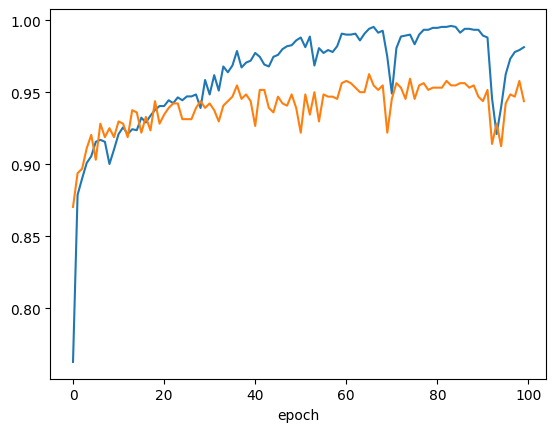

In [20]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

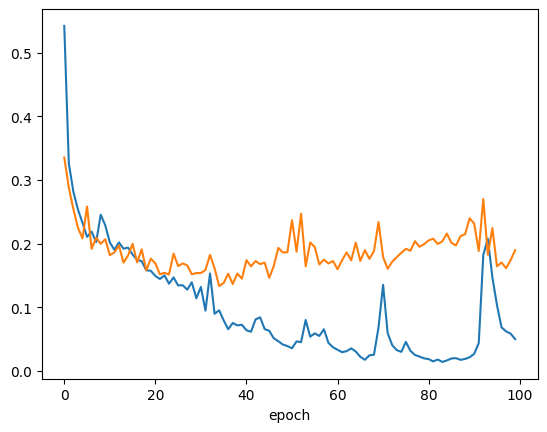

In [21]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epoch')

# Model Evaluation

In [22]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == label).sum().item()
    
    test_accuracy = correct / total

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9625
